In [ ]:
#  Lab-04
# Regression Models ----Experiment-1 : Consider a dataset ‘sales’ based on 'TV' marketing budget. Build a linear
# regression model to predict 'Sales' using 'TV' as the predictor variable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
url = "https://raw.githubusercontent.com/Yashappin/Machine-Learning/master/TvMarketing.csv"
df = pd.read_csv(url)

df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
# Understand Dataset Structure
print("Dataset Info:\n")
print(df.info())

print("\nDataset Description:\n")
print(df.describe())

print("\nDataset Shape:", df.shape)


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None

Dataset Description:

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000

Dataset Shape: (200, 2)


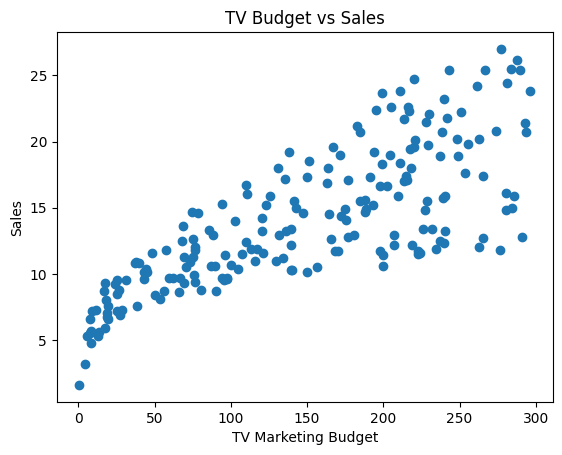

In [4]:
#Visualise Data
plt.scatter(df['TV'], df['Sales'])
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("TV Budget vs Sales")
plt.show()


In [5]:
#Split Data (80:20)
X = df[['TV']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)


X_train Shape: (160, 1)
X_test Shape: (40, 1)
y_train Shape: (160,)
y_test Shape: (40,)


In [7]:
# Train Linear Regression Model
# y = b0 + b1 * X

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])


Intercept (b0): 7.119638430592953
Coefficient (b1): 0.046529733705443346


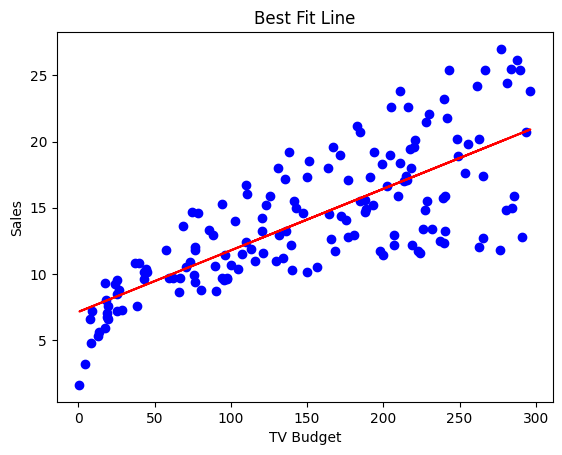

In [8]:
# Visualise Best Fit Line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.xlabel("TV Budget")
plt.ylabel("Sales")
plt.title("Best Fit Line")
plt.show()


In [9]:
# Predictions
y_pred = model.predict(X_test)


In [10]:
# Actual vs Predicted
result = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

print(result.head())


   Actual  Predicted
0    16.9  14.717944
1    22.4  16.211548
2    21.4  20.748197
3     7.3   7.664036
4    24.7  17.370139


In [ ]:
# RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


In [ ]:
"""Experiment-2: Multiple regression is a statistical method used to model the relationship
between multiple independent variables and a dependent variable. Perform multiple linear
regression using the following dataset."""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
from google.colab import files
uploaded = files.upload()


Saving DATA.csv to DATA.csv


In [4]:
import pandas as pd

df = pd.read_csv("DATA.csv")
df.head()


,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [7]:
df = pd.read_csv("DATA.csv")

print("First 5 Rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

print("\nDataset Shape:", df.shape)


First 5 Rows:
          Car       Model  Volume  Weight  CO2  Unnamed: 5
0      Toyota        Aygo    1000     790   99         NaN
1  Mitsubishi  Space Star    1200    1160   95         NaN
2       Skoda      Citigo    1000     929   95         NaN
3        Fiat         500     900     865   90         NaN
4        Mini      Cooper    1500    1140  105         NaN

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB
None

Dataset Description:
            Volume       Weight         CO2  Unnamed: 5
count    36.000000    36.000000   36.00000

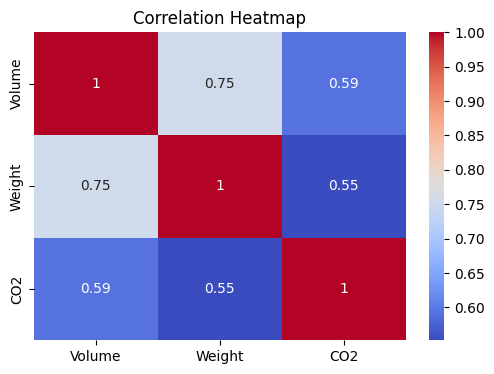

In [9]:
# Correlation Coefficient + Heatmap
corr = df[['Volume', 'Weight', 'CO2']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


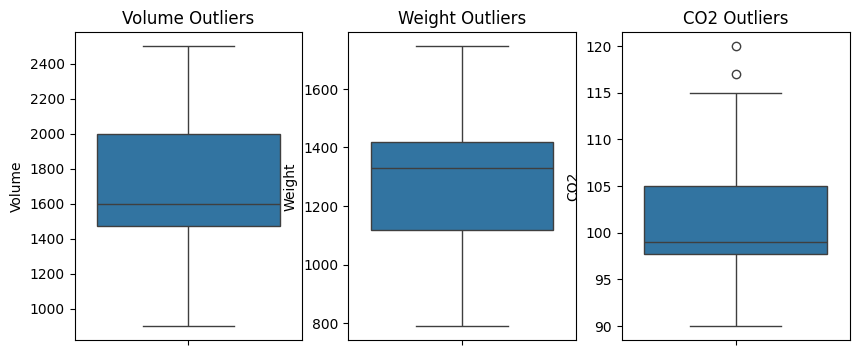

In [10]:
# Outlier Detection (Box Plot)
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.boxplot(y=df['Volume'])
plt.title("Volume Outliers")

plt.subplot(1,3,2)
sns.boxplot(y=df['Weight'])
plt.title("Weight Outliers")

plt.subplot(1,3,3)
sns.boxplot(y=df['CO2'])
plt.title("CO2 Outliers")

plt.show()


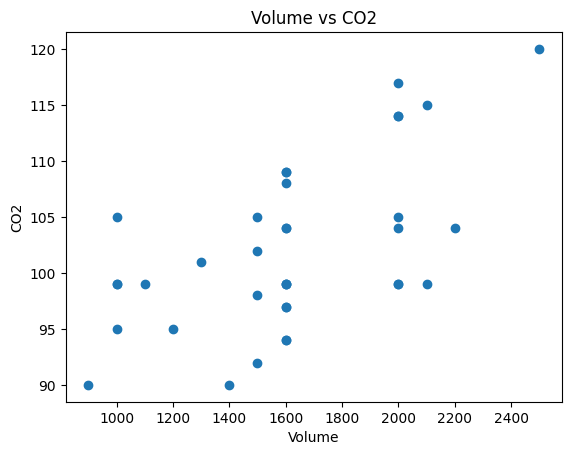

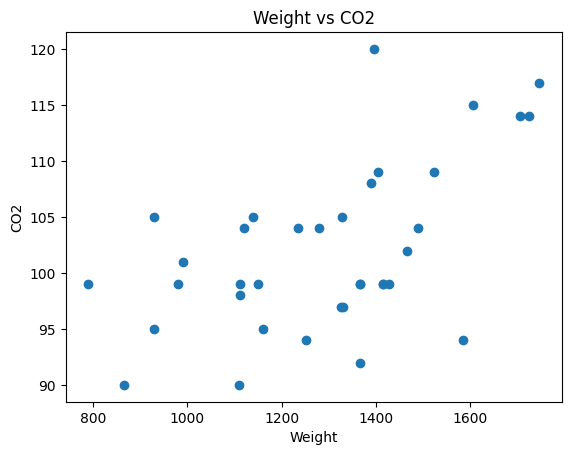

In [11]:
# Visualize Relation (Scatter Plot)
plt.scatter(df['Volume'], df['CO2'])
plt.xlabel("Volume")
plt.ylabel("CO2")
plt.title("Volume vs CO2")
plt.show()

plt.scatter(df['Weight'], df['CO2'])
plt.xlabel("Weight")
plt.ylabel("CO2")
plt.title("Weight vs CO2")
plt.show()


In [12]:
# Train Multiple Linear Regression Model (80:20)
X = df[['Volume', 'Weight']]
y = df['CO2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Model Parameters (Weights + Intercept)
print("Intercept (b0):", model.intercept_)
print("Coefficient for Volume (b1):", model.coef_[0])
print("Coefficient for Weight (b2):", model.coef_[1])


Intercept (b0): 84.21502006695282
Coefficient for Volume (b1): 0.004287414249075688
Coefficient for Weight (b2): 0.008049279585677119


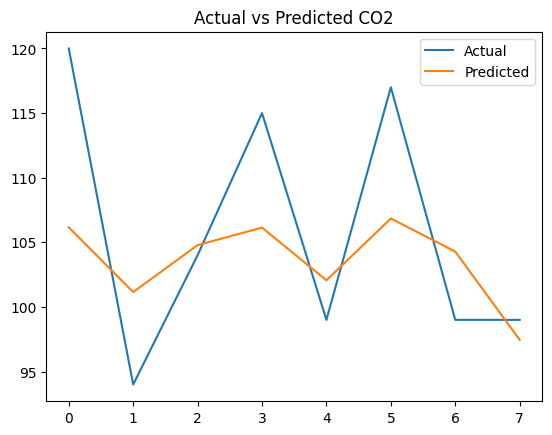

In [14]:
# True vs Predicted (Line Chart)
y_pred = model.predict(X_test)

plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted CO2")
plt.show()


In [15]:
# Error Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Square Error (MSE):", mse)
print("Root Mean Square Error (RMSE):", rmse)


Mean Absolute Error (MAE): 6.335639624274503
Mean Square Error (MSE): 58.07928583657771
Root Mean Square Error (RMSE): 7.620976698335832


In [ ]:
""" Experiment-3: Given below the link of a  dataset to predict whether a user will click on an online ad
based on their demographics, browsing behaviour, the context of the ad's display, and the time of day
using Logistic regression.  """

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)


In [17]:
from google.colab import files
uploaded = files.upload()


Saving advertising.csv to advertising.csv


In [18]:
df = pd.read_csv("advertising.csv")   # adjust file name

print(df.head())
print(df.info())
print(df.describe())


   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

In [19]:
# EDA (Missing Values + Transformation + Normalization)
print(df.isnull().sum())

df = df.dropna()


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


In [20]:
# Convert Categorical → Numeric
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [21]:
# Feature Scaling
scaler = StandardScaler()


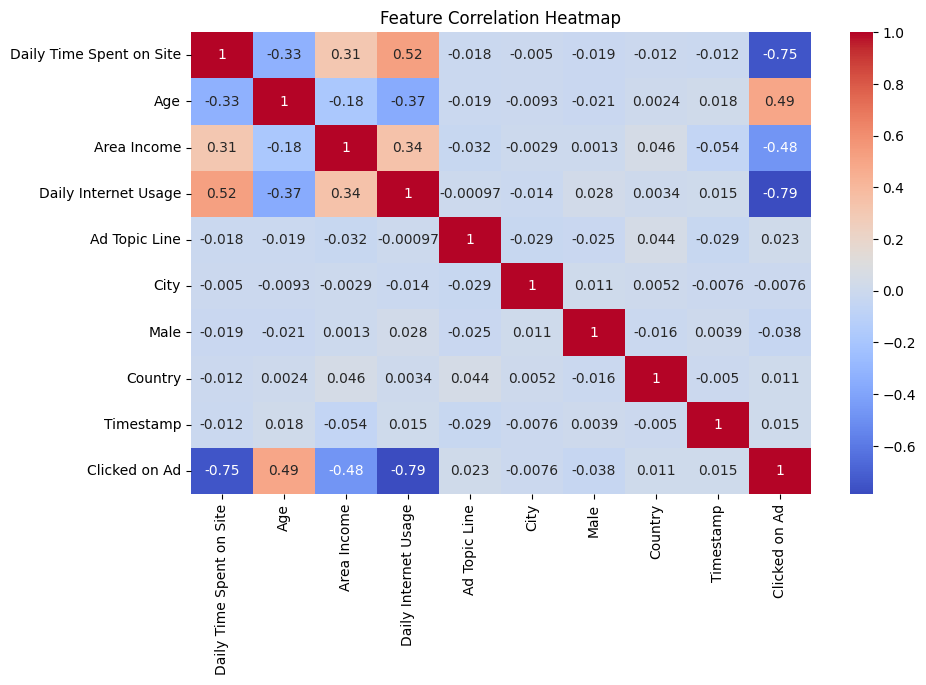

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [23]:
# Train Logistic Regression Model (80:20)
# Define Features & Target
X = df.drop(columns=['Clicked on Ad'])   # adjust if needed
y = df['Clicked on Ad']


In [24]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
# Normalize
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
# Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [27]:
# Model Parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [1.42633298]
Coefficients: [[-2.60620869  1.32784374 -1.64684602 -2.84905613  0.23582407 -0.32226366
  -0.32902504 -0.15859363  0.23344873]]


In [28]:
# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_train, y_train, cv=kfold)

print("K-Fold Scores:", scores)
print("Mean Accuracy:", scores.mean())


K-Fold Scores: [0.9875 0.975  0.975  0.9625 0.975 ]
Mean Accuracy: 0.975


In [29]:
# Classification Report
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94        89
           1       0.96      0.95      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



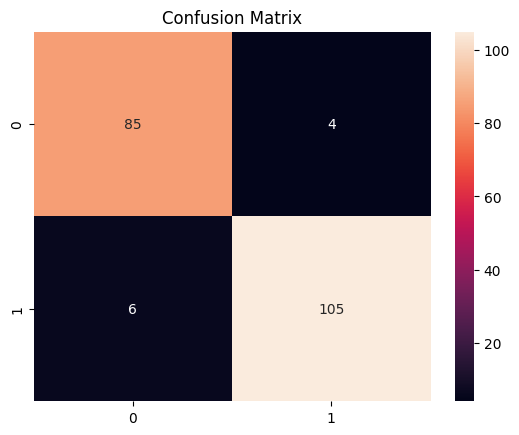

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


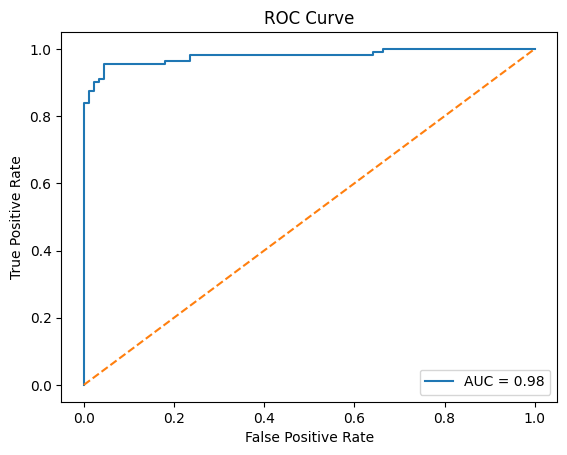

In [31]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


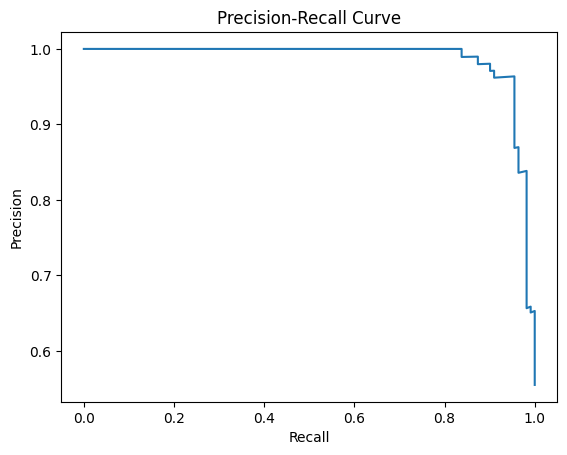

In [32]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


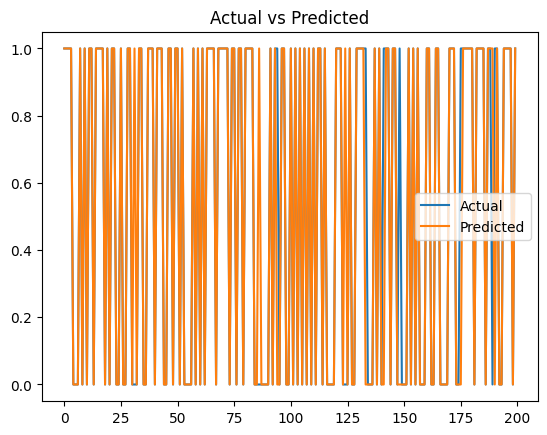

In [33]:
# Actual vs Predicted Visualization
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted")
plt.show()
